In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [14]:
tmp_df = pd.read_csv('tmp_data.csv', index_col=0)
tmp_df

,A,B,C,D
사직동,0.756808,0.837151,0.367741,0.856218
삼청동,0.827742,0.304679,0.923518,0.000679
부암동,0.568917,0.924518,0.056251,0.260088
평창동,0.580705,0.584580,0.844815,0.060866
무악동,0.139818,0.303443,0.598331,0.312935
...,...,...,...,...
성내3동,0.080882,0.473552,0.109079,0.319963
둔촌1동,0.879560,0.419096,0.563044,0.629431
둔촌2동,0.984323,0.984479,0.826605,0.679809
상일1동,0.479461,0.830551,0.686072,0.301943


In [40]:
X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)

In [50]:
data = tmp_df
mini = MiniBatchKMeans(n_clusters=10, batch_size=1000, compute_labels=True).fit(tmp_df)
mini.fit(data)

C:\Users\Yeon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
C:\Users\Yeon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


MiniBatchKMeans(batch_size=1000, n_clusters=10)

In [51]:
print(mini.labels_)

[6 1 6 1 2 4 6 8 3 6 2 0 9 6 2 7 7 7 7 7 1 7 1 8 4 5 7 3 6 5 9 7 7 6 1 3 9
 0 0 9 1 7 7 3 1 3 4 0 9 2 8 8 9 8 4 7 0 7 4 7 0 8 8 1 3 7 7 6 0 4 6 3 0 2
 4 6 7 8 7 7 4 4 4 4 2 6 2 9 1 5 4 1 4 4 3 2 7 4 8 8 1 4 3 4 3 1 6 5 0 4 0
 3 2 6 4 4 5 6 2 0 6 7 1 1 9 5 0 2 3 8 9 2 8 6 2 7 3 9 7 0 5 6 6 1 5 8 1 5
 0 1 1 6 0 9 2 0 2 5 7 7 4 8 0 5 2 9 9 4 8 5 5 0 0 4 1 1 0 3 8 6 8 0 9 3 2
 8 1 8 1 7 5 7 3 0 9 7 4 0 0 0 9 5 9 8 8 2 7 5 3 2 3 8 5 7 2 1 4 1 2 0 4 1
 8 4 8 9 8 3 4 8 5 7 9 0 7 1 0 7 0 4 5 2 0 1 4 2 5 4 8 3 2 4 7 0 7 2 7 7 4
 4 3 8 0 1 6 7 0 7 0 5 5 2 4 5 4 9 1 8 8 8 3 5 2 0 1 9 4 4 6 4 4 2 2 3 5 1
 4 3 5 4 0 3 4 4 8 6 7 1 5 7 8 3 3 3 5 6 2 7 4 6 5 8 7 3 9 4 1 9 8 5 0 7 4
 3 4 0 3 9 4 3 4 4 8 9 0 5 7 0 6 1 8 1 3 3 1 9 1 7 2 4 5 7 6 4 7 9 5 2 7 4
 1 6 7 3 4 4 7 5 2 7 9 3 3 4 0 0 7 0 9 0 5 1 3 5 5 2 1 5 4 1 6 0 9 4 2 1 3
 5 6 1 0 1 6 4 2 7 6 1 2 2 0 2 8 6 7 2]


In [52]:
tmp_df['cluster'] = mini.labels_

In [53]:
tmp_df.groupby('cluster').count()

,A,B,C,D,Cluster
cluster,,,,,
0,47,47,47,47,47
1,45,45,45,45,45
2,40,40,40,40,40
3,39,39,39,39,39
4,60,60,60,60,60
5,39,39,39,39,39
6,33,33,33,33,33
7,55,55,55,55,55
8,38,38,38,38,38


In [54]:
score_samples = silhouette_samples(data, tmp_df['cluster'])
tmp_df['silhouette_coeff']=score_samples

print()

average_score = silhouette_score(data, tmp_df['cluster'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.733


In [55]:
tmp_df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.779250
1    0.716610
2    0.681829
3    0.813718
4    0.670809
5    0.754183
6    0.794045
7    0.747844
8    0.682435
9    0.725399
Name: silhouette_coeff, dtype: float64

In [42]:
t_array = tmp_df.to_numpy()

IndexError: index 63300 is out of bounds for axis 0 with size 426

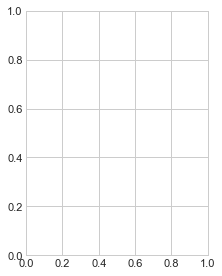

In [46]:
idx = np.random.randint(150000, size=300)
plt.subplot(122)
plt.scatter(t_array[idx, 0], t_array[idx, 1], c=mini.labels_[idx])
plt.title("미니배치 K-평균 군집화")
plt.tight_layout()
plt.show()